In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd

In [67]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [68]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import and_
from sqlalchemy import or_
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, desc

In [69]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [70]:
# reflect an existing database into a new model

In [71]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [72]:
# We can view all of the classes that automap found
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [73]:
# reflect the tables

In [74]:
# Save references to each table
Measurement = Base.classes.measurement;
Station     = Base.classes.station; 

In [75]:
# Create our session (link) from Python to the DB
session = Session(engine)

<div class="alert alert-block alert-info">
<b>Progress:</b> 
Now ready to query the database
</div>

# Exploratory Climate Analysis

In [76]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Get the last data point (max date) from the database
max_date = session.query(func.max(Measurement.date)).first()

In [77]:
# convert string max_date to DATE type last_date
last_date = dt.datetime.strptime(max_date[0], '%Y-%m-%d')
#print(last_date)

In [78]:
# Calculate the date 1 year ago from the last data point in the database
one_year_before = last_date - timedelta(days=365)

In [79]:
last_date_str       = last_date.strftime("%Y-%m-%d")
one_year_before_str = one_year_before.strftime("%Y-%m-%d")

#### Design a query to retrieve the last 12 months of precipitation data and plot the results


In [80]:
# Load the results into a pandas dataframe. 
# Save the query results as a Pandas DataFrame and set the index to the date column

results = session.query(Measurement.station, Measurement.prcp, Measurement.date)\
                .filter(and_(Measurement.date >= one_year_before_str, Measurement.date <= last_date_str))

# for r in results:
#   print (r)

In [81]:
df = pd.DataFrame(results[:], columns=['Station', 'Prcp', 'Date'])

### Convert the date column to a Date Type for ease of computation
df['Date'] = pd.to_datetime(df['Date'])
### Set the index to the Date column
df.set_index('Date', inplace=True, )
#df.head(100)
#df.shape

In [82]:
# Sort the dataframe by date
df = df.sort_index(ascending=False)
df.head()

,Station,Prcp
Date,,
2017-08-23,USC00516128,0.45
2017-08-23,USC00519523,0.08
2017-08-23,USC00514830,0.00
2017-08-23,USC00519397,0.00
2017-08-22,USC00519523,0.00


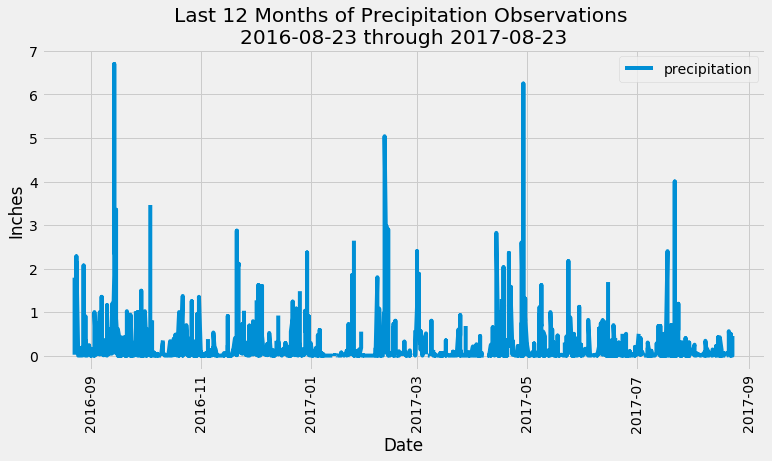

In [83]:
x_values = df.index
y_values = df['Prcp']

ax = plt.gca()

plt.plot(x_values, y_values, label = "precipitation")
#plot values
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title ( f'Last 12 Months of Precipitation Observations \n{one_year_before_str} through {last_date_str}')
plt.legend(loc='upper right')
plt.xticks(rotation=90)



fig= plt.gcf()
fig.set_size_inches(15, 5.5)     # set a suitable size
plt.subplots_adjust(right=0.75) 

plt.show()



In [84]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<div class="alert alert-block alert-info">
<b>Observation:</b> 
There is very little rain in Hawaii, apart from a few months of the year
</div>

In [85]:
# Design a query to show how many stations are available in this dataset?
#print(Station.__dict__.keys())

num_stations = session.query(func.count(Station.station)).first()
print(f"There are {num_stations[0]} stations available in this dataset ")


There are 9 stations available in this dataset 


In [86]:
number_of_stations = session.query(func.count(distinct(Measurement.station))).first()
print(f"There are {number_of_stations[0]} stations available in this dataset")

There are 9 stations available in this dataset


In [87]:
# results = session.query(Station.id, Station.station, Station.name).\
#     order_by(Station.id.desc()).all()

# for r in results:
#   print(r)

In [88]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

##### COME BACK AND DO STATION NAME IN. HERE 
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(desc(func.count(Measurement.station)))

#for station in most_active_stations:
#    print(station)
    
station_count_df = pd.DataFrame(most_active_stations[:], columns=['Station', 'Station Count'])
station_count_df

,Station,Station Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [89]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = station_count_df.iloc[0]['Station']
#print(station_id)
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station_id).first()
#print(low_temp[0])
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station_id).first()
#print(high_temp[0])#ave_temp = session.query(func.ave(Measurement.tobs)).filter(Measurement.station == station_id).first()
ave_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_id).first()
# print(Measurement.__dict__.keys())
# print(Station.__dict__.keys())
print(f"For (most active) Station id {station_id}\n"
      f"The lowest temperature recorded is {low_temp[0]} degrees\n" +
      f"The highest temperature recorded is {high_temp[0]} degrees\n" +
      f"The average temperature is {round(ave_temp[0],2)}")

For (most active) Station id USC00519281
The lowest temperature recorded is 54.0 degrees
The highest temperature recorded is 85.0 degrees
The average temperature is 71.66


<div class="alert alert-block alert-info">
<b>Progress:</b> 
The temperature range in Hawaii is moderate - never very cold or very hot
</div>

In [90]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [91]:
highest_temp_obs = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.tobs))\
                    .group_by(Measurement.station).order_by(desc(func.count(Measurement.tobs)))
# for h in highest_temp_obs:
#      print (h)
station_tobs = highest_temp_obs[0][0]
print(f"The station with the highest number of temperature observations is {station_tobs}")

The station with the highest number of temperature observations is USC00519281


In [92]:
# print(Station.__dict__.keys())
# print(Measurement.__dict__.keys())

In [93]:
### Get the data for that station
results = session.query(Measurement.station, Measurement.prcp, Measurement.tobs, Measurement.date)\
                .filter(Measurement.station == station_tobs) \
                .filter(and_(Measurement.date >= one_year_before_str, Measurement.date <= last_date_str))

temperature_obs_df = pd.DataFrame(results[:], columns=['Station', 'Precipitation', 'Temperature', 'date'])

temperature_obs_df.head(3)

,Station,Precipitation,Temperature,date
0,USC00519281,1.79,77.0,2016-08-23
1,USC00519281,2.15,77.0,2016-08-24
2,USC00519281,0.06,80.0,2016-08-25


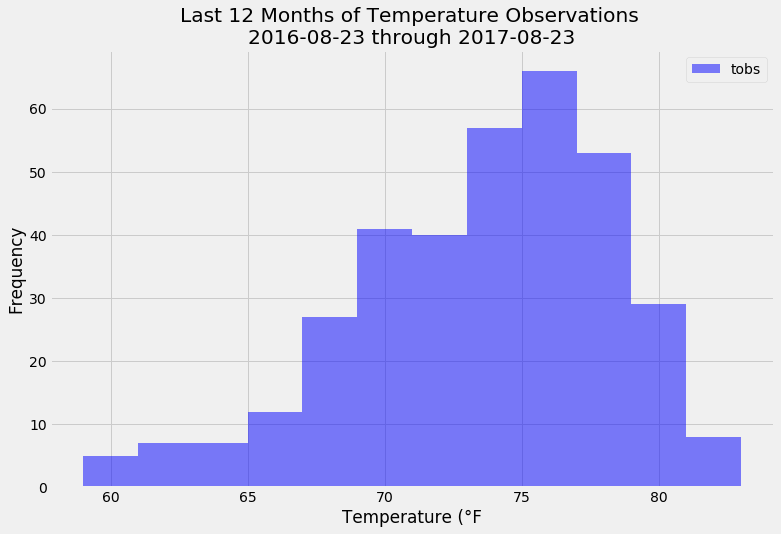

In [94]:
x = temperature_obs_df['Temperature']
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5,label='tobs' )

plt.xlabel(u'Temperature (\N{DEGREE SIGN}F')
plt.ylabel('Frequency')
plt.title ( f'Last 12 Months of Temperature Observations \n{one_year_before_str} through {last_date_str}')
plt.legend()

fig= plt.gcf()
fig.set_size_inches(15, 7.5)     # set a suitable size
plt.subplots_adjust(right=0.75) 

plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> 
The recorded temperature for the given dates is mostly between 75 and 77 degrees (F)
</div>

## Bonus Challenge Assignment

In [95]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [96]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = pd.to_datetime('2017-07-23')
trip_end_date   = pd.to_datetime('2017-08-08')

one_year_before_start = trip_start_date - timedelta(days=365)
one_year_before_end   = trip_end_date   - timedelta(days=365)

one_year_before_start = one_year_before_start.strftime("%Y-%m-%d")
one_year_before_end   = one_year_before_end.strftime("%Y-%m-%d")

#print(calc_temps(one_year_before_start, one_year_before_end))
prev_year = calc_temps(one_year_before_start, one_year_before_end)
tmin = prev_year[0][0]
tavg = prev_year[0][1]
tmax = prev_year[0][2]

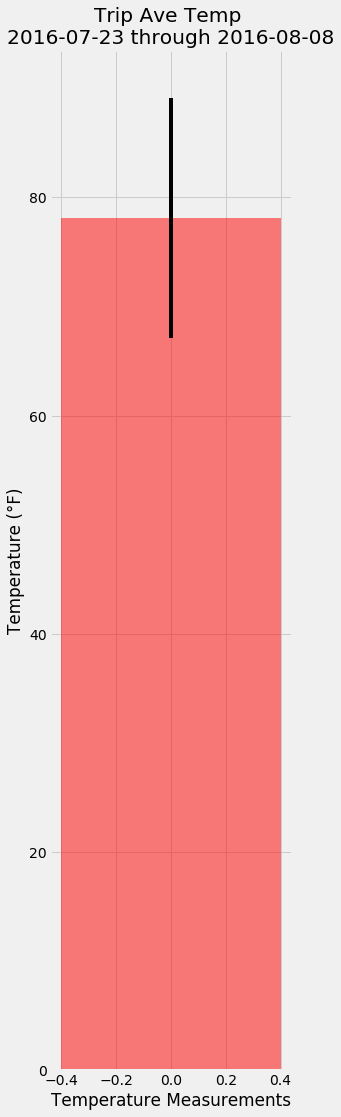

In [115]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

peak_to_peak = tmax - tmin

plt.bar(0, tavg, color = 'r', alpha = 0.5, align='center', yerr=peak_to_peak)

plt.xlabel( 'Temperature Measurements')
plt.ylabel(u'Temperature (\N{DEGREE SIGN}F)')
plt.title ( f'Trip Ave Temp \n{one_year_before_start} through {one_year_before_end}')

fig= plt.gcf()
fig.set_size_inches(5, 17.5)     # set a suitable size
plt.subplots_adjust(right=0.75) 

plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> 
The average temperature looks perfect for the vacation
</div>

In [98]:
# This function called `calc_rainfall` will accept start date and end date in the format '%Y-%m-%d' 
# and return the total amount of rainfall for that range of dates
def calc_rainfall(start_date, end_date):
    """STATION, NAME, LATITUDE, LONGITUDE, ELEVATION, and PRECIPTIATION for a list of rainfall.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        STATION, NAME, LATITUDE, LONGITUDE, ELEVATION, and PRECIPTIATION 
    """
    
#     
    return session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,\
         func.sum(Measurement.prcp)).group_by(Station.name).filter(Station.station == Measurement.station)\
        .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [99]:
# Calculate the total amount of rainfall per weather station for your trip dates 
# using the previous year's matching dates.
# Sort this in descending order by precipitation amount a
# and list the station, name, latitude, longitude, and elevation


#print(calc_rainfall(one_year_before_start, one_year_before_end))
rain_results = calc_rainfall(one_year_before_start, one_year_before_end)

rainfall_df = pd.DataFrame(rain_results[:], columns=['Station', 'Name', 'Latitute',\
                                                     'Longitude', 'Elevation', 'Precipitation'])

#df.groupby('Station').sum()
rainfall_df

rainfall_df.sort_values(by=['Precipitation'], ascending=False)

,Station,Name,Latitute,Longitude,Elevation,Precipitation
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,17.55
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,16.19
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,11.98
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,5.36
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,4.98
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.10
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.19


In [100]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
#daily_normals("01-01")

In [101]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date = pd.to_datetime('2017-07-23')
trip_end_date   = pd.to_datetime('2017-08-08')

# Use the start and end date to create a range of dates
range_of_dates = pd.date_range(start=trip_start_date, end=trip_end_date)
#range_of_dates


# Strip off the year and save a list of %m-%d strings
dates_list = []
for r in range_of_dates:
    #print(r.strftime("%m-%d"))
    dates_list.append(r.strftime("%m-%d"))

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for day in dates_list:
    dn = daily_normals(day)
    normals.append([dn[0][0],dn[0][1], dn[0][2]])


In [102]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates = pd.DataFrame(normals, columns = ['Min', 'Ave', 'Max'], index = dates_list)
trip_dates.head(3)

,Min,Ave,Max
07-23,70.0,76.203704,84.0
07-24,69.0,76.555556,81.0
07-25,67.0,76.890909,84.0


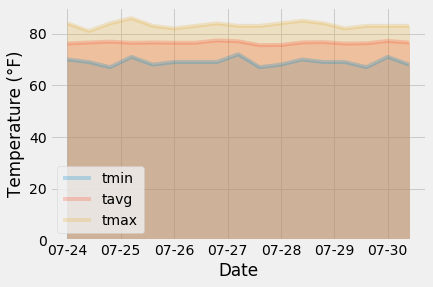

In [109]:
# Plot the daily normals as an area plot with `stacked=False`


ax = trip_dates.plot.area(stacked=False, alpha=0.25)

ax.set_xlabel("Date")
ax.set_ylabel(u'Temperature (\N{DEGREE SIGN}F)')
ax.set_xticklabels(trip_dates.index)
_ = ax.legend(['tmin', 'tavg', 'tmax'])


#plt.subplots_adjust(right=0.75) 


<div class="alert alert-block alert-info">
<b>Observation:</b> 
The temperature ranges look ideal for the vacation
</div>

# End of Notebook 